In [1]:
import random
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import math


In [2]:
# current notable shortfalls: reinfection is just as likely as primary infection, the model is oversimplified jank

tot = 200 # number of people
friends = 3 # number of contacts generated for each person; note that we end up with more than tot*friends connections because of lolcode
steps = 5
p_infection = 0.2 # assumption about the probability of getting infected from a single infected contact in 1 time step
duration = 10 # assumption about how long after getting infected you remain infectious
adoption_p = 0.1 # what fraction of the population has the app


Start
{0: [122, 84, 164, 113], 1: [141, 150, 198], 2: [7, 144, 175, 47, 111], 3: [31, 159, 197, 104], 4: [74, 31, 93], 5: [80, 18, 41, 48, 87], 6: [42, 174, 93, 185], 7: [2, 135, 153, 141], 8: [114, 83, 177, 90], 9: [139, 111, 178, 35, 99, 134], 10: [30, 114, 199, 36, 87], 11: [86, 129, 14, 166], 12: [165, 169, 57, 129], 13: [19, 27, 128, 68, 117, 127, 195], 14: [11, 187, 129, 66], 15: [93, 27, 189, 185], 16: [98, 83, 29, 120], 17: [153, 110, 145, 45, 55], 18: [5, 37, 41, 129], 19: [13, 95, 170, 34, 143], 20: [72, 173, 33], 21: [188, 72, 198], 22: [169, 128, 111, 25, 178], 23: [116, 56, 69, 47, 81, 96, 97], 24: [195, 82, 178, 43, 74, 109, 142, 152, 181, 185], 25: [68, 194, 22, 38, 58, 112, 181], 26: [157, 89, 136, 69, 100], 27: [13, 15, 101], 28: [59, 136, 95, 32, 67, 189], 29: [16, 109, 44, 63, 85, 169], 30: [10, 84, 147, 130, 139, 161], 31: [3, 4, 126, 139], 32: [28, 119, 104, 106, 144, 173], 33: [20, 149, 193, 40, 70, 198], 34: [171, 37, 19, 50], 35: [9, 155, 129, 140], 36: [10, 135

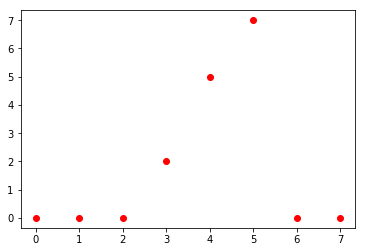

{0: [0, 1], 1: [0, 0], 2: [4, 0], 3: [4, 0], 4: [0, 0], 5: [0, 0], 6: [0, 0], 7: [0, 0], 8: [0, 0], 9: [0, 0], 10: [0, 1], 11: [0, 0], 12: [0, 0], 13: [0, 0], 14: [0, 0], 15: [4, 0], 16: [0, 0], 17: [0, 0], 18: [0, 0], 19: [0, 0], 20: [0, 1], 21: [0, 0], 22: [0, 0], 23: [0, 0], 24: [0, 0], 25: [0, 0], 26: [0, 0], 27: [0, 0], 28: [4, 0], 29: [0, 0], 30: [0, 1], 31: [0, 0], 32: [2, 0], 33: [0, 0], 34: [0, 0], 35: [0, 0], 36: [0, 0], 37: [0, 0], 38: [0, 0], 39: [0, 0], 40: [0, 1], 41: [0, 0], 42: [0, 0], 43: [0, 0], 44: [0, 0], 45: [0, 0], 46: [0, 0], 47: [3, 0], 48: [0, 0], 49: [0, 0], 50: [0, 1], 51: [0, 0], 52: [0, 0], 53: [0, 0], 54: [0, 0], 55: [0, 0], 56: [0, 0], 57: [0, 0], 58: [0, 0], 59: [0, 0], 60: [0, 1], 61: [0, 0], 62: [0, 0], 63: [0, 0], 64: [0, 0], 65: [0, 0], 66: [0, 0], 67: [0, 0], 68: [0, 0], 69: [0, 0], 70: [0, 1], 71: [0, 0], 72: [0, 0], 73: [0, 0], 74: [0, 0], 75: [0, 0], 76: [0, 0], 77: [0, 0], 78: [0, 0], 79: [0, 0], 80: [0, 1], 81: [0, 0], 82: [0, 0], 83: [0, 0], 8

In [3]:
net1 = Network()
contacts = {}
infected = {} # tracks whether you are infected, and if so, when did you get infected
k = 0
t1 = 0
c = 0

print("Start")

# setup
for i in range(tot):
    contacts[i] = []
    if (c % math.floor(1 / adoption_p) == 0):
        infected[i] = [0, 1] # time of infection, app adoption
    else:
        infected[i] = [0, 0] # time of infection, app adoption
    c += 1

# this generates {friends} connections for each person, meaning that there will be ~1.5x as many connections as there would be with more careful code
for i in range(tot):
    for j in range(friends):
        if (len(contacts[i]) == friends):
            break
        r = random.randrange(tot)
        while (r == i):
            r = random.randrange(tot);
        # print(r, j, i, "--------------")
        # print(r, i, contacts[r], contacts[i])
        if (r not in contacts[i]):
            contacts[i].append(r)
            k += 1
        if (i not in contacts[r]):
            contacts[r].append(i)
            k += 1
        # print(r, i, contacts[r], contacts[i])
        
def infect_step(t):
    for person in contacts:
        for friend in contacts[person]:
            if (infected[friend][0] > 0):
                r = random.randrange(0, 100)
                if (r < p_infection*100):
                    infected[person][0] = t
                    net1.add_node(person, label=str(person), color = "red")
        if (t > infected[person][0] + duration):
            infected[person][0] = 0
    return(t+1)

def check_add_node(target, graph):
    if (infected[target][0] > 0):
        graph.add_node(target, str(target), color = "red")
    else:
        graph.add_node(target, str(target), color = "blue")
    return(graph)

def waterfall_edges(target, graph, already_graphed):
    for friend in contacts[target]:
        if (friend not in already_graphed):
            already_graphed.append(friend)
            check_add_node(friend, graph)
            graph.add_edge(target, friend)
            waterfall_edges(friend, graph, already_graphed)
            
def generate_graph(graph):
    for person in infected:
            check_add_node(person, graph)
    for person in contacts:
        for friend in contacts[person]:
            graph.add_edge(person, friend)
            
    graph.show("graph.html")
    return(graph)
            

def generate_histogram(targets, contacts):
    histo = []
    seen = set()
    def walk(layer, depth):
        print(layer, "-----")
        if (len(layer) == 0):
            return
        next_layer = []
        n_infected = 0
        for target in layer:
            if (target not in seen):
                seen.add(target)
                next_layer += contacts[target]
                if (infected[target][0] > 0):
                    n_infected += 1
                    print(target)
        histo.append(n_infected)
        walk(next_layer, depth + 1)
        
    walk(targets, 0)
    return histo
    

infected[2][0] = 1
for i in range(steps):
    t1 = infect_step(t1)
print(contacts)


generate_graph(net1)
y_axis = generate_histogram([0], contacts)
x_axis = []
for el in range(len(y_axis)):
    x_axis.append(el)
plt.plot(x_axis, y_axis, 'or')
plt.show()


print(infected)
print("End ", k)

4
[8]
[8, 5, 7]
